# Sequential Sampling

This section provides implementation for the concepts covered in the class for sequential sampling, refer lecture notes for more details. Following methods are covered:

1. Exploitation
2. Exploration
3. Lower Confidence Bound
4. Probability of Improvement
5. Expected Improvement

As discussed in the lecture, these methods are used to find global minimum or an globally accurate model of an expensive to evaluate blackbox function. To do this, a surrogate model is built with few initial points and then model is updated with new points using one of the above methods. In this section, focus is on finding global minimum of the function. **Modified Branin function** (given below) is used as a test function to demonstrate the working of these methods.

$$
    \begin{gathered}
        f(x_1, x_2) = \Bigg ( x_2 - \frac{5.1}{4\pi^2} x_1^2 + \frac{5}{\pi}x_1 - 6 \Bigg)^2 + 10 \Bigg( 1-\frac{1}{8\pi} \Bigg)\cos x_1 + 10 + 5x_1 \\
        -5 \leq x_1 \leq 10 \text{ and } 0 \leq x_2 \leq 15
    \end{gathered}
$$

Global minimum of the function is $f(x^*) = -16.644$ at $x^* = (-3.689, 13.630)$. For demonstration, gaussian process models will be used. Below block of code plots the true function and global minimum.

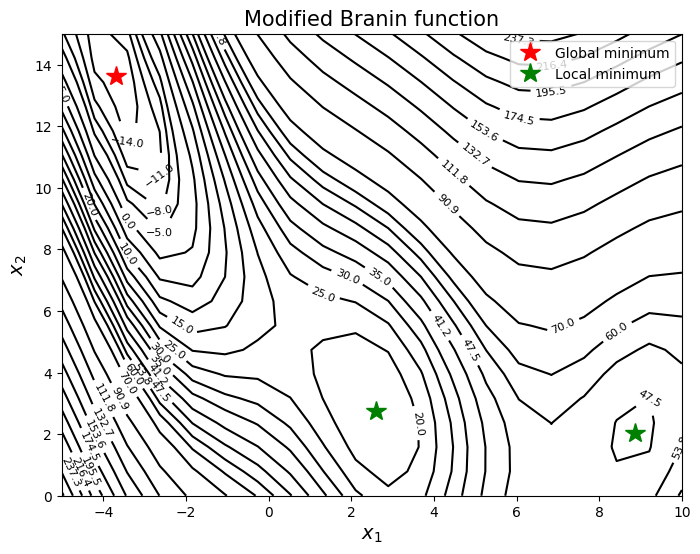

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from smt.sampling_methods import FullFactorial

def modified_branin(x):

    dim = x.ndim

    if dim == 1:
        x = x.reshape(1, -1)

    x1 = x[:,0]
    x2 = x[:,1]

    b = 5.1 / (4*np.pi**2)
    c = 5 / np.pi
    t = 1 / (8*np.pi)

    y = (x2 - b*x1**2 + c*x1 - 6)**2 + 10*(1-t)*np.cos(x1) + 10 + 5*x1

    if dim == 1:
        y = y.reshape(-1)

    return y

# Bounds
lb = np.array([-5, 10])
ub = np.array([0, 15])

# Plotting data
sampler = FullFactorial(xlimits=np.array([lb, ub]))
num_plot = 400
xplot = sampler(num_plot)
yplot = modified_branin(xplot)

# Reshaping into grid
reshape_size = int(np.sqrt(num_plot))
X = xplot[:,0].reshape(reshape_size, reshape_size)
Y = xplot[:,1].reshape(reshape_size, reshape_size)
Z = yplot.reshape(reshape_size, reshape_size)

# Level
levels = np.linspace(-17, -5, 5)
levels = np.concatenate((levels, np.linspace(0, 30, 7)))
levels = np.concatenate((levels, np.linspace(35, 60, 5)))
levels = np.concatenate((levels, np.linspace(70, 300, 12)))

fig, ax = plt.subplots(figsize=(8,6))
CS=ax.contour(X, Y, Z, levels=levels, colors='k', linestyles='solid')
ax.clabel(CS, inline=1, fontsize=8)
ax.plot(-3.689, 13.630, 'r*', markersize=15, label="Global minimum")
ax.plot(2.594, 2.741, 'g*', markersize=15, label="Local minimum")
ax.plot(8.877, 2.052,'g*', markersize=15)
ax.set_xlabel("$x_1$", fontsize=14)
ax.set_ylabel("$x_2$", fontsize=14)
ax.set_title("Modified Branin function", fontsize=15)
ax.legend()

As can be seen from above plot, the function has multiple local minima and the goal is to find the global minimum using surrogate model and sequential sampling.